In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trending-tv-shows-on-netflix/TV Shows - Netflix.csv


# Recommendation of Netflix Data
#### Link: https://www.kaggle.com/ritesh2000/trending-tv-shows-on-netflix

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading 

In [3]:
data_frame = pd.read_csv('/kaggle/input/trending-tv-shows-on-netflix/TV Shows - Netflix.csv')
data_frame.head()

,Titles,Year,Rating,IMDB_Rating,Netflix
0,Breaking Bad,2008,18+,9.5,1
1,Game of Thrones,2011,18+,9.3,0
2,Rick and Morty,2013,18+,9.2,0
3,Dark,2017,16+,8.8,1
4,Stranger Things,2016,16+,8.8,1


In [4]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Titles       50 non-null     object 
 1   Year         50 non-null     int64  
 2   Rating       50 non-null     object 
 3   IMDB_Rating  50 non-null     float64
 4   Netflix      50 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


- Appart from Title and Rating we can see that all the other values are either Int of Float.
- Suggestion: Transform the Rating column.

In [5]:
# just cross checking if there are any null values.
data_frame.isnull().sum()

Titles         0
Year           0
Rating         0
IMDB_Rating    0
Netflix        0
dtype: int64

In [6]:
# check for duplicates : No duplicate records
data_frame.duplicated().value_counts()

False    50
dtype: int64

In [7]:
# data description: No significan't outliers
data_frame.describe()

,Year,IMDB_Rating,Netflix
count,50.000000,50.000000,50.000000
mean,2009.900000,8.722000,0.380000
std,6.746881,0.358734,0.490314
min,1989.000000,8.000000,0.000000
25%,2005.250000,8.500000,0.000000
50%,2011.000000,8.700000,0.000000
75%,2015.000000,8.900000,1.000000
max,2019.000000,9.500000,1.000000


In [8]:
data_frame['Rating'].value_counts()

18+    27
16+    19
7+      4
Name: Rating, dtype: int64

# 2. Data Visualisation

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'IMDB_Rating'}>],
       [<AxesSubplot:title={'center':'Netflix'}>, <AxesSubplot:>]],
      dtype=object)

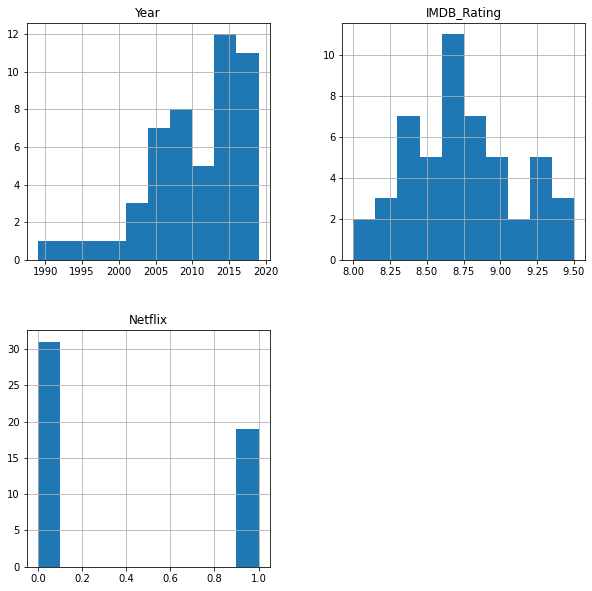

In [9]:
data_frame.hist(figsize=[10,10])

- Year column is negatively skewed, we will use standard scalar to make the distribution better.

<AxesSubplot:xlabel='Rating', ylabel='count'>

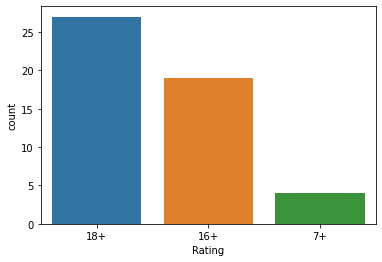

In [10]:
sns.countplot(data = data_frame, x='Rating')

# 3. Data Transformation

In [11]:
# label encoding for the rating column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Rating'] = le.fit_transform(data_frame['Rating'])
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Titles       50 non-null     object 
 1   Year         50 non-null     int64  
 2   Rating       50 non-null     int64  
 3   IMDB_Rating  50 non-null     float64
 4   Netflix      50 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

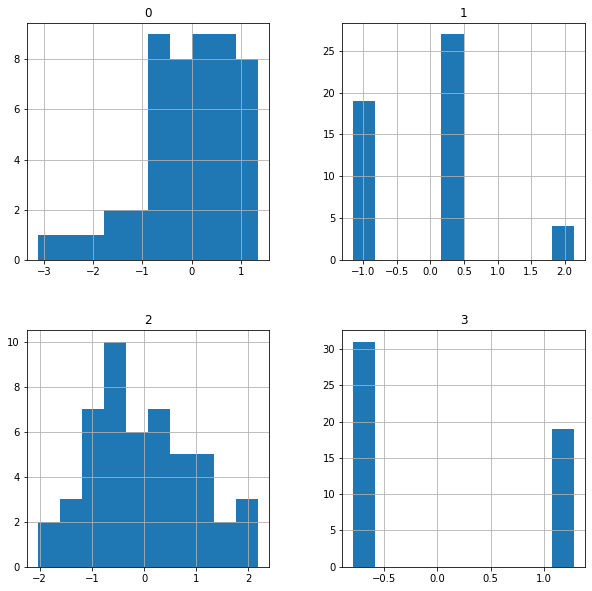

In [12]:
# scaling the X columns.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = data_frame.drop('Titles', axis=1)
y = data_frame['Titles']

X = ss.fit_transform(X)
pd.DataFrame(X).hist(figsize=[10,10])

In [13]:
# Will make a seperate Variable for PCA to see how better is our predictions
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 4. Model Selection

In [14]:
from numpy import dot
from numpy.linalg import norm

def cosine_sim(query, index):
    cosine =[]
    query = np.array(X[query,:])
    for i in range(len(index[0])):
        temp = np.array(X[index[0][i],:])
        score = dot(query, temp)/(norm(query)*norm(temp))
        cosine.append(score)
    return cosine

## 4.1 Without PCA

In [15]:
from sklearn.neighbors import NearestNeighbors

NN = NearestNeighbors(metric='cosine', algorithm='brute')
NN.fit(X)

query = np.random.choice(X.shape[0])

# need to reshape the data to follow a find he nearest neighbours
distances, index = NN.kneighbors(X = X[query,:].reshape(1, -1),n_neighbors=6)
cosine = cosine_sim(query, index)

In [16]:
# Print the recomendations and their distances
for i in range(len(index.flatten())):
    if(i==0):
        print('Recomendation for {0}:'.format(data_frame.iloc[query]['Titles']), end='\n\n')
    else:
        print('{}: {}, with distance of {:.4f}:'.format(i, data_frame.iloc[index.flatten()[i]]['Titles'], 
                                                       distances.flatten()[i]))

Recomendation for Ozark:

1: Ozark, with distance of 0.0000:
2: The Witcher, with distance of 0.0195:
3: Mindhunter, with distance of 0.0407:
4: Marvel's Daredevil, with distance of 0.0451:
5: Hannibal, with distance of 0.0475:


In [17]:
# Print the recomendations and their similarity
for i in range(len(index.flatten())):
    if(i==0):
        print('Recomendation for {0}:'.format(data_frame.iloc[query]['Titles']), end='\n\n')
    else:
        print('{}: {}, with similarity of {:.2f}%'.format(i, data_frame.iloc[index.flatten()[i]]['Titles'], 
                                                       cosine[i]*100))

Recomendation for Ozark:

1: Ozark, with similarity of 100.00%
2: The Witcher, with similarity of 98.05%
3: Mindhunter, with similarity of 95.93%
4: Marvel's Daredevil, with similarity of 95.49%
5: Hannibal, with similarity of 95.25%


## 4.2 With PCA

In [18]:
NN = NearestNeighbors(metric='cosine', algorithm='brute')
NN.fit(X_pca)

query = np.random.choice(X.shape[0])

# need to reshape the data to follow a find he nearest neighbours
distances, index = NN.kneighbors(X = X_pca[query,:].reshape(1, -1),n_neighbors=6)
cosine = cosine_sim(query, index)

In [19]:
# Print the recomendations and their distances
for i in range(len(index.flatten())):
    if(i==0):
        print('Recomendation for {0}:'.format(data_frame.iloc[query]['Titles']), end='\n\n')
    else:
        print('{}: {}, with distance of {:.4f}:'.format(i, data_frame.iloc[index.flatten()[i]]['Titles'], 
                                                       distances.flatten()[i]))

Recomendation for Parks and Recreation:

1: Lost, with distance of 0.0000:
2: Supernatural, with distance of 0.0004:
3: Attack on Titan, with distance of 0.0015:
4: Mad Men, with distance of 0.0074:
5: Fringe, with distance of 0.0085:


In [20]:
# Print the recomendations and their similarity
for i in range(len(index.flatten())):
    if(i==0):
        print('Recomendation for {0}:'.format(data_frame.iloc[query]['Titles']), end='\n\n')
    else:
        print('{}: {}, with similarity of {:.2f}%'.format(i, data_frame.iloc[index.flatten()[i]]['Titles'], 
                                                       cosine[i]*100))

Recomendation for Parks and Recreation:

1: Lost, with similarity of 84.22%
2: Supernatural, with similarity of 89.78%
3: Attack on Titan, with similarity of 84.23%
4: Mad Men, with similarity of 98.00%
5: Fringe, with similarity of 94.24%
